# SVM (Support Vector Machine)

## 학습 목표
1. **서포트 벡터 머신(SVM)** 의 기본 원리를 이해할 수 있다
2. **마진(Margin)**과 **서포트 벡터(Support Vector)** 의 개념을 설명할 수 있다
3. **커널 트릭(Kernel Trick)** 을 이해하고 다양한 커널을 적용할 수 있다
4. SVM의 주요 하이퍼파라미터(C, gamma)를 조정할 수 있다
5. **SVC** 와 **SVR** 의 차이점을 이해하고 적절히 활용할 수 있다

## 주요 내용
- SVM의 기본 개념과 원리
- 하드 마진 vs 소프트 마진
- 커널 종류 (Linear, RBF, Polynomial)
- C 파라미터 (규제 강도)
- gamma 파라미터 (결정 경계의 유연성)
- 분류(SVC)와 회귀(SVR) 적용

## 서포트 벡터 머신이란

서포트 벡터 머신(이하 SVM)은 결정 경계(Decision Boundary), 즉 분류를 위한 기준 선을 정의하는 모델이다. 그래서 분류되지 않은 새로운 점이 나타나면 경계의 어느 쪽에 속하는지 확인해서 분류 과제를 수행할 수 있게 된다.

결국, 이 결정 경계라는 걸 어떻게 정의하고 계산하는지 이해하는 게 중요하다.

만약 데이터에 2개 속성(feature)만 있다면 결정 경계는 이렇게 간단한 선 형태가 될 거다.

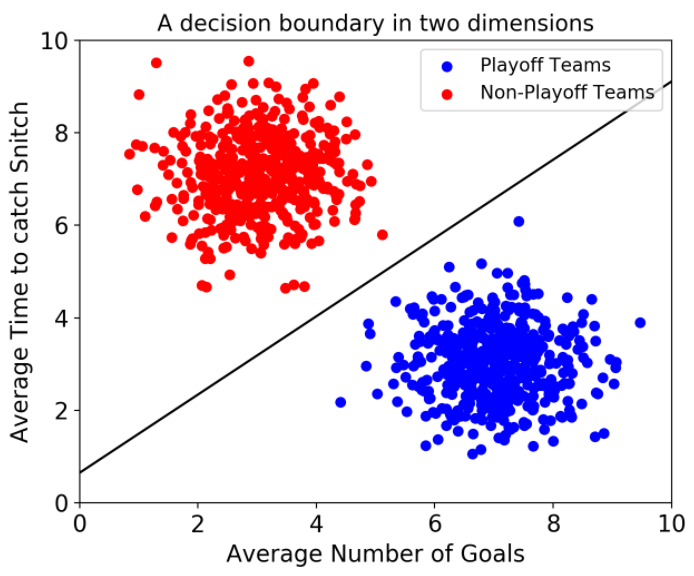

그러나 속성이 3개로 늘어난다면 이렇게 3차원으로 그려야 한다.

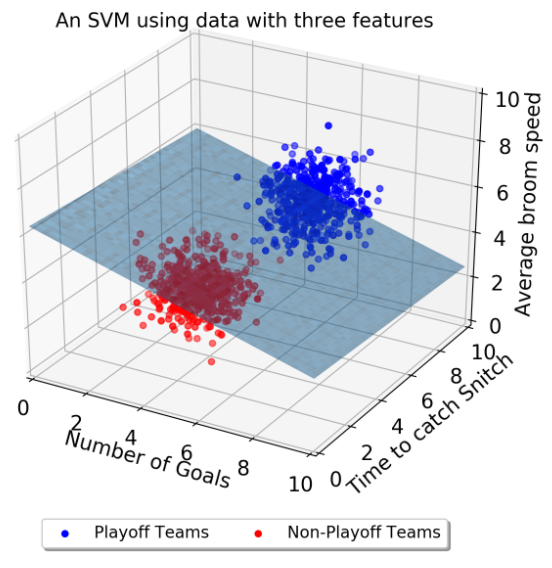

그리고 이 때의 결정 경계는 ‘선’이 아닌 ‘평면’이 된다.

우리가 이렇게 시각적으로 인지할 수 있는 범위는 딱 3차원까지다. 차원, 즉 속성의 개수가 늘어날수록 당연히 복잡해질 거다. 결정 경계도 단순한 평면이 아닌 고차원이 될 텐데 이를 “초평면(hyperplane)”이라고 부른다. (어렵게 생각할 필요는 없다. 일단 용어만 알고 넘어가자.)

## 최적의 결정 경계(Decision Boundary)

결정 경계는 무수히 많이 그을 수 있을 거다. 어떤 경계가 좋은 경계일까?

일단 아래 그림들을 보자.

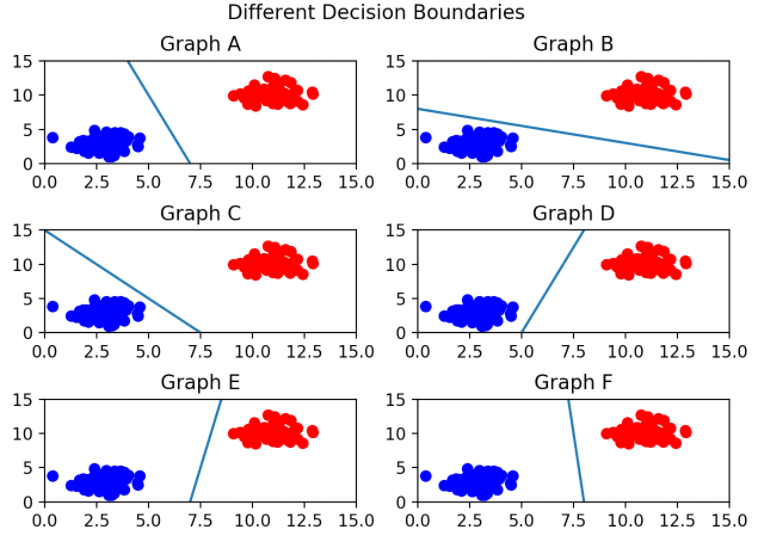

어떤 그래프가 제일 위태로워 보이는가?
C를 보면 선이 파란색 부류와 너무 가까워서 아슬아슬해보인다.

그렇다면 어떤 결정 경계가 가장 적절해보이는가?
당연히 F다. 두 클래스(분류) 사이에서 거리가 가장 멀기 때문이다.

이제 결정 경계는 데이터 군으로부터 최대한 멀리 떨어지는 게 좋다는 걸 알았다. 실제로 서포트 벡터 머신(Support Vector Machine)이라는 이름에서 Support Vectors는 결정 경계와 가까이 있는 데이터 포인트들을 의미한다. 이 데이터들이 경계를 정의하는 결정적인 역할을 하는 셈이다.

이어서 마진(Margin)이라는 용어에 대해 알아보자.

## 마진(Margin)

마진(Margin)은 결정 경계와 서포트 벡터 사이의 거리를 의미한다.

아래 그림을 보면 바로 이해된다.

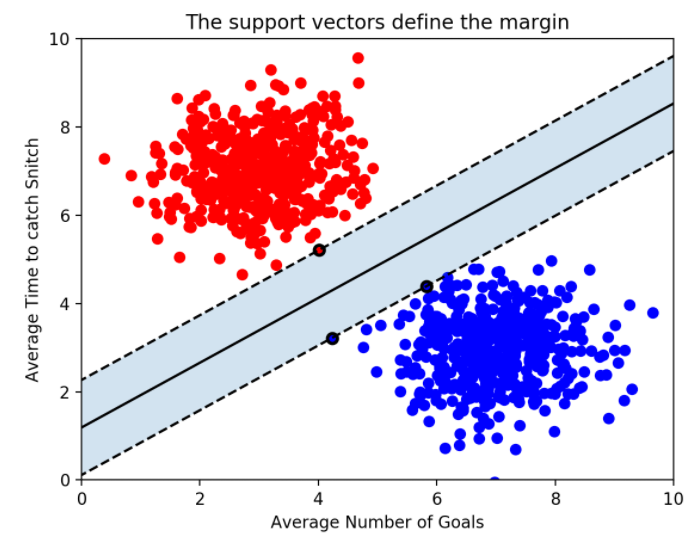

가운데 실선이 하나 그어져있는데, 이게 바로 ‘결정 경계’가 되겠다. 그리고 그 실선으로부터 검은 테두리가 있는 빨간점 1개, 파란점 2개까지 영역을 두고 점선을 그어놓았다. 점선으로부터 결정 경계까지의 거리가 바로 ‘마진(margin)’이다.

여기서 일단 결론을 하나 얻을 수 있다. **최적의 결정 경계는 마진을 최대화한다.**

그리고 위 그림에서는 x축과 y축 2개의 속성을 가진 데이터로 결정 경계를 그었는데, 총 3개의 데이터 포인트(서포트 벡터)가 필요했다. 즉, **n개의 속성을 가진 데이터에는 최소 n+1개의 서포트 벡터가 존재한다** 는 걸 알 수 있다.

이번엔 SVM 알고리즘의 장점을 하나 알 수 있다.

대부분의 머신러닝 지도 학습 알고리즘은 학습 데이터 모두를 사용하여 모델을 학습한다. 그런데 **SVM에서는 결정 경계를 정의하는 게 결국 서포트 벡터이기 때문에 데이터 포인트 중에서 서포트 벡터만 잘 골라내면 나머지 쓸 데 없는 수많은 데이터 포인트들을 무시할 수 있다. 그래서 매우 빠르다.**

## Scikit-learn으로 구현해 보자!

### make_blobs 함수 소개

`make_blobs`는 scikit-learn에서 제공하는 가상 데이터 생성 함수입니다. 클러스터링이나 분류 알고리즘을 테스트할 때 유용합니다.

**주요 파라미터:**
- `n_samples`: 생성할 데이터 포인트의 총 개수
- `centers`: 클러스터(중심점)의 개수
- `cluster_std`: 클러스터의 표준편차 (작을수록 데이터가 밀집됨)
- `random_state`: 재현 가능한 결과를 위한 난수 시드

이 함수는 등방성(isotropic) 가우시안 분포를 따르는 데이터를 생성합니다. 등방성이란 모든 방향에서 동일한 성질을 가진다는 의미입니다.

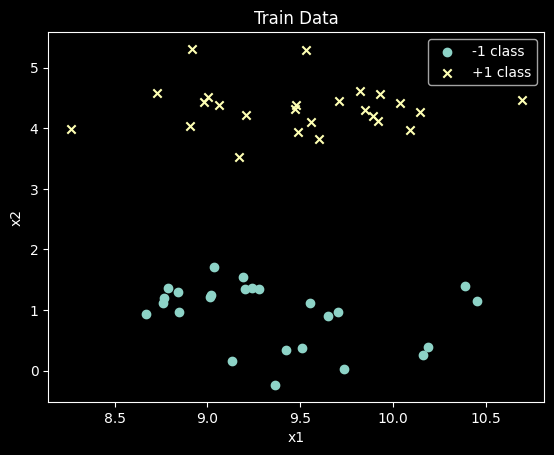

In [ ]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

# make_blobs 함수는 등방성 가우시안 정규분포를 이용해 가상 데이터를 생성한다.
# 등방성이라는 것은 모든 방향에서 같은 성질을 가진다는 것이다.
X, y = make_blobs(n_samples=50, centers=2, cluster_std=0.5, random_state=4)
y = 2 * y - 1

plt.scatter(X[y == -1, 0], X[y == -1, 1], marker="o", label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker="x", label="+1 class")
plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("Train Data")
plt.show()

In [ ]:
from sklearn.svm import SVC

classifier = SVC(kernel="linear", C=1e10).fit(X, y)
# 아래랑 같은 과정. C = 1e10은 매우 큰 값이므로, 매우 작은 규제를 의미한다. - >10의 10승
# 1. 모델 생성
# classifier = SVC(kernel="linear", C=1e10)
# 2. 모델 학습 따로 떼서 
# classifier.fit(X, y)

In [ ]:
print(classifier.predict([[3, 2]]))

[-1]


In [ ]:
print(classifier.n_support_)

[1 1]


In [ ]:
print(classifier.support_)

[42  1]


In [40]:
print(classifier.support_vectors_)

[[9.03715314 1.71813465]
 [9.17124955 3.52485535]]


In [41]:
type(X)

numpy.ndarray

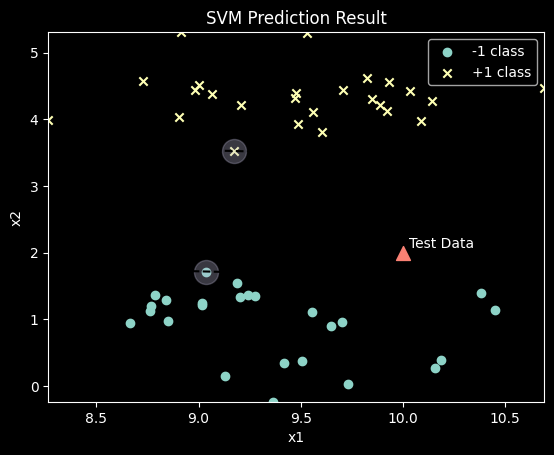

In [ ]:
import matplotlib.pyplot as plt

xmin = X[:, 0].min()
xmax = X[:, 0].max()
ymin = X[:, 1].min()
ymax = X[:, 1].max()
xx = np.linspace(xmin, xmax, 10)
yy = np.linspace(ymin, ymax, 10)
X1, X2 = np.meshgrid(xx, yy)

Z = np.empty(X1.shape)
for (i, j), val in np.ndenumerate(X1):
    x1 = val
    x2 = X2[i, j]
    p = classifier.decision_function([[x1, x2]])
    Z[i, j] = p[0]
levels = [-1, 0, 1]
linestyles = ["dashed", "solid", "dashed"]
plt.scatter(X[y == -1, 0], X[y == -1, 1], marker="o", label="-1 class")
plt.scatter(X[y == +1, 0], X[y == +1, 1], marker="x", label="+1 class")
plt.contour(X1, X2, Z, levels, colors="k", linestyles=linestyles)
plt.scatter(
    classifier.support_vectors_[:, 0],
    classifier.support_vectors_[:, 1],
    s=300,
    alpha=0.3,
)

x_new = [10, 2]
plt.scatter(x_new[0], x_new[1], marker="^", s=100)
plt.text(x_new[0] + 0.03, x_new[1] + 0.08, "Test Data")

plt.xlabel("x1")
plt.ylabel("x2")
plt.legend()
plt.title("SVM Prediction Result")

plt.show()

위의 코드는 아래의 주소를 참조하였다.  
https://hleecaster.com/ml-svm-concept/

In [ ]:
from sklearn.datasets import load_iris

iris = load_iris()
X1 = iris.data[:100, :2]
y1 = iris.target[:100]

from sklearn.svm import SVC

model1 = SVC(kernel="linear", C=1e10).fit(X1, y1)

from sklearn.metrics import classification_report

print(classification_report(y1, model1.predict(X1)))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       1.00      1.00      1.00        50

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



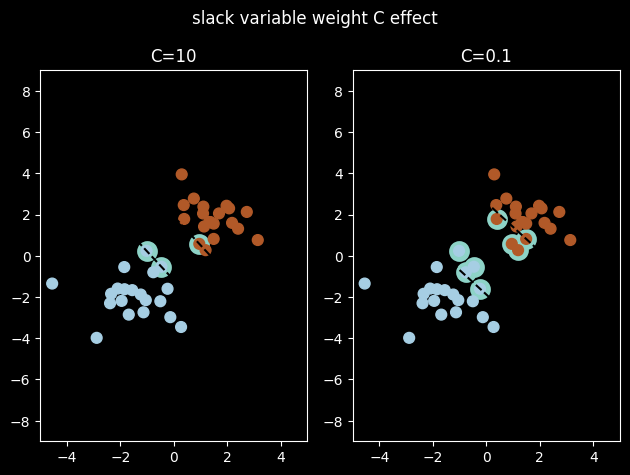

In [ ]:
np.random.seed(0)
X = np.r_[np.random.randn(20, 2) - [2, 2], np.random.randn(20, 2) + [2, 2]]
Y = [-1] * 20 + [1] * 20

plotnum = 1
for name, penalty in (("C=10", 10), ("C=0.1", 0.1)):
    clf = SVC(kernel="linear", C=penalty).fit(X, Y)
    xx = np.linspace(-5, 5)

    x_jin = -5
    x_jax = 5
    y_jin = -9
    y_jax = 9
    XX, YY = np.mgrid[x_jin:x_jax:200j, y_jin:y_jax:200j]

    levels = [-1, 0, 1]
    linestyles = ["dashed", "solid", "dashed"]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)

    plt.subplot(1, 2, plotnum)
    plt.contour(XX, YY, Z, levels, colors="k", linestyles=linestyles)
    plt.scatter(
        clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=120, linewidth=4
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, s=60, linewidth=1, cmap=plt.cm.Paired)
    plt.xlim(x_jin, x_jax)
    plt.ylim(y_jin, y_jax)
    plt.title(name)

    plotnum += 1

plt.suptitle("slack variable weight C effect")
plt.tight_layout()
plt.show()